In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
pd.set_option("display.max_rows", None)  # Esto mostrará todas las filas
pd.set_option("display.max_columns", None)  # Esto mostrará todas las columnas

In [114]:
seminuevos_df = pd.read_csv("/content/drive/MyDrive/MONTE DE PIEDAD - AUTOAVANZA INTERNA/SCRAPE/dataset_seminuevos-scrape_may2025.csv")

In [115]:
seminuevos_df.shape

(8953, 10)

In [116]:
seminuevos_df.columns

Index(['carroceria', 'color', 'combustible', 'descripcion', 'fecha', 'marca',
       'modelo', 'odometro', 'precio', 'url'],
      dtype='object')

In [117]:
seminuevos_df.dtypes

,0
carroceria,object
color,object
combustible,object
descripcion,object
fecha,float64
marca,object
modelo,object
odometro,object
precio,float64
url,object


In [118]:
seminuevos_df.head()

,carroceria,color,combustible,descripcion,fecha,marca,modelo,odometro,precio,url
0,Coupé,Amarillo Imola,Gasolina,Documentación:* Factura Original* Único Dueño*...,2015.0,Mercedes Benz,GTS AMG,25200 Kms.,1990000.0,https://www.seminuevos.com/vehicle/autos-merce...
1,Camioneta SUV,NaN,NaN,NaN,2017.0,GMC,Yukon Denali,120000 Kms.,450000.0,https://www.seminuevos.com/vehicle/autos-gmc-y...
2,Camioneta SUV,NaN,NaN,NaN,2006.0,Ford,Escape Limited,142630 Millas,105000.0,https://www.seminuevos.com/vehicle/autos-ford-...
3,Hatchback (5 Puertas),NaN,NaN,NaN,2015.0,Nissan,March,95000 Kms.,138500.0,https://www.seminuevos.com/vehicle/autos-nissa...
4,Camioneta SUV,NaN,NaN,NaN,2020.0,Audi,Q3,50000 Kms.,629000.0,https://www.seminuevos.com/vehicle/autos-audi-...


In [119]:
#Cardinalidad
seminuevos_df.nunique()

,0
carroceria,20
color,129
combustible,4
descripcion,2199
fecha,46
marca,68
modelo,1029
odometro,4526
precio,1824
url,8953


Tendencia temporal 46 años 1968 - 2026

In [120]:
#Limpia: carroceria, combustible, marca, precio
#Requiere limpieza: color, odometro (quitar kms)
#Volver INT: fecha
#demasiada cardinalidad: descripción, modelo, url
#Descripción podemos armar algo de NLP
#seminuevos_df['marca'].value_counts().sort_values()
seminuevos_df['odometro'].value_counts().sort_index()

,count
odometro,
0 Kms.,43
1 Kms.,17
10 Kms.,8
100 Kms.,30
1000 Kms.,5
10000 Kms.,16
100000 Kms.,42
100005 Kms.,1
100064 Kms.,1


In [121]:
#datos faltantes
na= seminuevos_df.isna().mean()*100
print(na)

carroceria      2.568971
color          17.770580
combustible    20.719312
descripcion    70.389813
fecha           0.089356
marca           0.089356
modelo          0.089356
odometro        0.089356
precio          0.089356
url             0.000000
dtype: float64


In [122]:
#descriptivos
seminuevos_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carroceria,8723,20,Camioneta SUV,3866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,7362,129,Blanco,2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combustible,7098,4,Gasolina,6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descripcion,2651,2199,GTR AUTOMOTRIZ S.A. DE C.V.,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,8945.0,NaN,NaN,NaN,2019.399553,4.086005,1968.0,2017.0,2020.0,2022.0,2026.0
marca,8945,68,Chevrolet,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo,8945,1029,CR-V,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometro,8945,4526,68000 Kms.,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precio,8945.0,NaN,NaN,NaN,509228.239128,3879774.165156,30000.0,270000.0,374900.0,544900.0,365990000.0
url,8953,8953,https://www.seminuevos.com/vehicle/autos-nissa...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **LIMPIEZA**

In [123]:
#Limpia: carroceria, combustible, marca, precio
#Requiere limpieza: color, odometro (quitar kms)
#Volver INT: fecha
#demasiada cardinalidad: descripción, modelo, url
#Descripción podemos armar algo de NLP

**FECHA**

In [124]:
seminuevos_df["fecha"] = seminuevos_df["fecha"].fillna(0).astype(int)
seminuevos_df["fecha"]=seminuevos_df["fecha"].astype(str)

**ODOMETRO**

In [125]:
seminuevos_df = pd.read_csv("/content/drive/MyDrive/MONTE DE PIEDAD - AUTOAVANZA INTERNA/SCRAPE/dataset_seminuevos-scrape_may2025.csv")

In [126]:
seminuevos_df[['odometro_int', 'km_millas']] = seminuevos_df['odometro'].str.split(' ', n=1, expand=True)
seminuevos_df["odometro_int"] = seminuevos_df["odometro_int"].astype('Int64')


#ESTO NO SIRVE... por el momento ODOMETRO_INT es la final y hay que borrar los datos de Millas
seminuevos_df['odometro_clean'] = np.where(
    seminuevos_df['km_millas'] == 'Millas',
    seminuevos_df['odometro_int'] * 1.60934,
    seminuevos_df['odometro_int']
)

In [127]:
seminuevos_df.dtypes

,0
carroceria,object
color,object
combustible,object
descripcion,object
fecha,float64
marca,object
modelo,object
odometro,object
precio,float64
url,object


In [128]:
seminuevos_df['km_millas'].value_counts()

,count
km_millas,
Kms.,8918
Millas,27


In [152]:
#Me sale en notación cientifica pero parece en el descriptivo que salio bien
seminuevos_df['odometro_clean'].value_counts()

,count
odometro_clean,
6.800000e+04,84
6.000000e+04,74
9.000000e+04,71
8.900000e+04,70
7.500000e+04,68
8.800000e+04,67
7.000000e+04,67
5.000000e+04,66
8.200000e+04,66


In [151]:
seminuevos_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carroceria,8723,20,Camioneta SUV,3866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,7362,46,Blanco,2413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combustible,7098,4,Gasolina,6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descripcion,2651,2199,GTR AUTOMOTRIZ S.A. DE C.V.,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha,8945.0,NaN,NaN,NaN,2019.399553,4.086005,1968.0,2017.0,2020.0,2022.0,2026.0
marca,8945,68,Chevrolet,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo,8945,1029,CR-V,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometro,8945,4526,68000 Kms.,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precio,8945.0,NaN,NaN,NaN,509228.239128,3879774.165156,30000.0,270000.0,374900.0,544900.0,365990000.0
url,8953,8953,https://www.seminuevos.com/vehicle/autos-nissa...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**COLOR**

In [145]:
seminuevos_df[['color', 'tipo_color']] = seminuevos_df['color'].str.split(' ', n=1, expand=True)
seminuevos_df['color'].value_counts()

,count
color,
Blanco,2413
Gris,1313
Negro,952
Plata,878
Rojo,776
Azul,634
Naranja,59
Verde,58
Vino,39


**VALORES ATIPICOS Y DISTRIBUCIONES SESGADAS**

¿Hay valores atípicos en el conjunto de datos?
¿Existen distribuciones sesgadas en el conjunto de datos?

In [131]:
seminuevos_df.skew(numeric_only=True)

,0
fecha,-2.746385
precio,93.486625
odometro_int,10.606015
odometro_clean,10.453688


In [132]:
kurtosis = seminuevos_df.kurt(numeric_only=True)
print(kurtosis)

fecha               19.10404
precio             8807.3248
odometro_int      286.516376
odometro_clean     279.42527
dtype: Float64


* precio, odometro_int presentan una asimetría fuertemente positiva (skewness > 10), lo que indica una distribución sesgada a la derecha: la mayoría de los valores son bajos y hay pocos muy altos, típicos de autos muy caros o con alto kilometraje.

* fecha muestra asimetría negativa (skewness = -2.74), es decir, hay más autos recientes y pocos modelos muy antiguos que sesgan la distribución a la izquierda.

* En cuanto a curtosis, todas las variables son leptocúrticas (curtosis >> 3), lo que sugiere presencia de outliers. Destaca precio con una curtosis extrema (8807), seguido por odometro_int y odometro_clean (> 270), lo que indica valores atípicos significativos en esas variables.

In [133]:
numerical_columns = seminuevos_df.select_dtypes(include=[np.number]).columns

In [134]:
categorical_columns = seminuevos_df.select_dtypes(include=['object']).columns

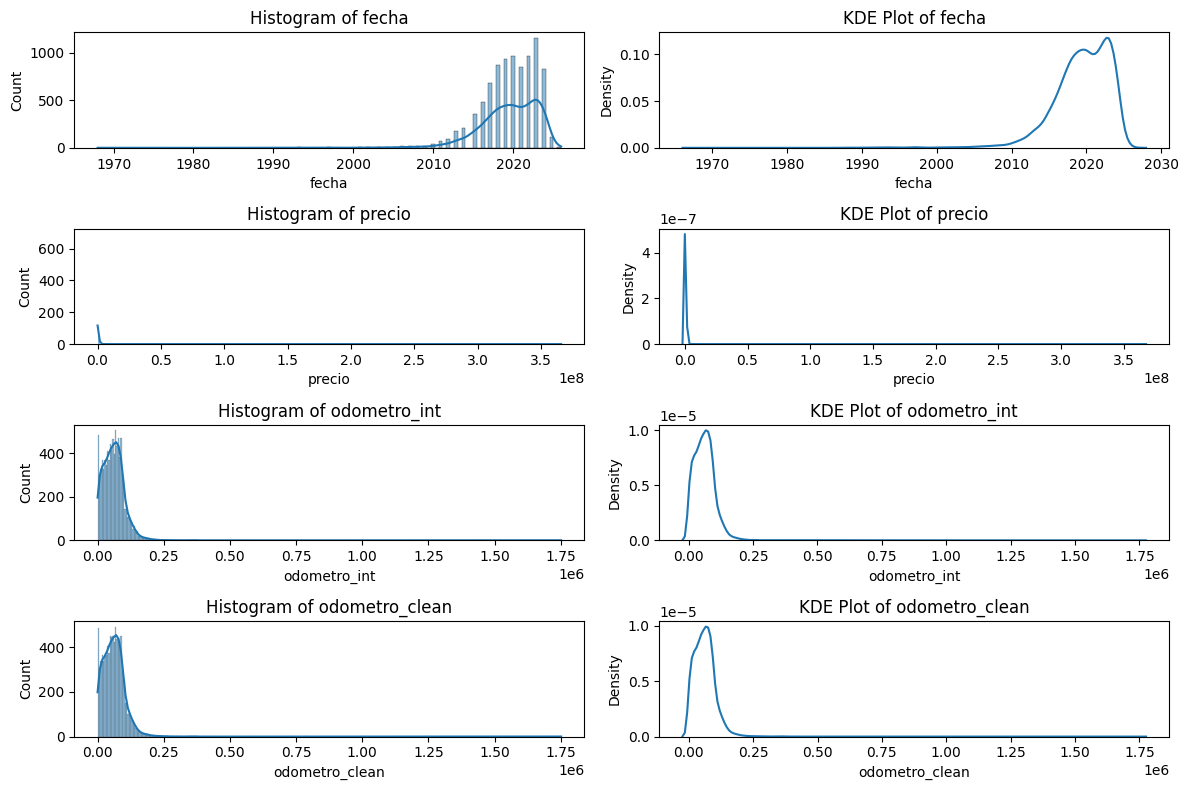

In [135]:
#estoy creando los subplots (ncols=2 columnas)
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 2 * len(numerical_columns)))

# Para i=0, y hasta el ultimo elemento que tenga en la columna numerica
for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(data=seminuevos_df, x=col, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')

    # KDE
    sns.kdeplot(data=seminuevos_df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'KDE Plot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

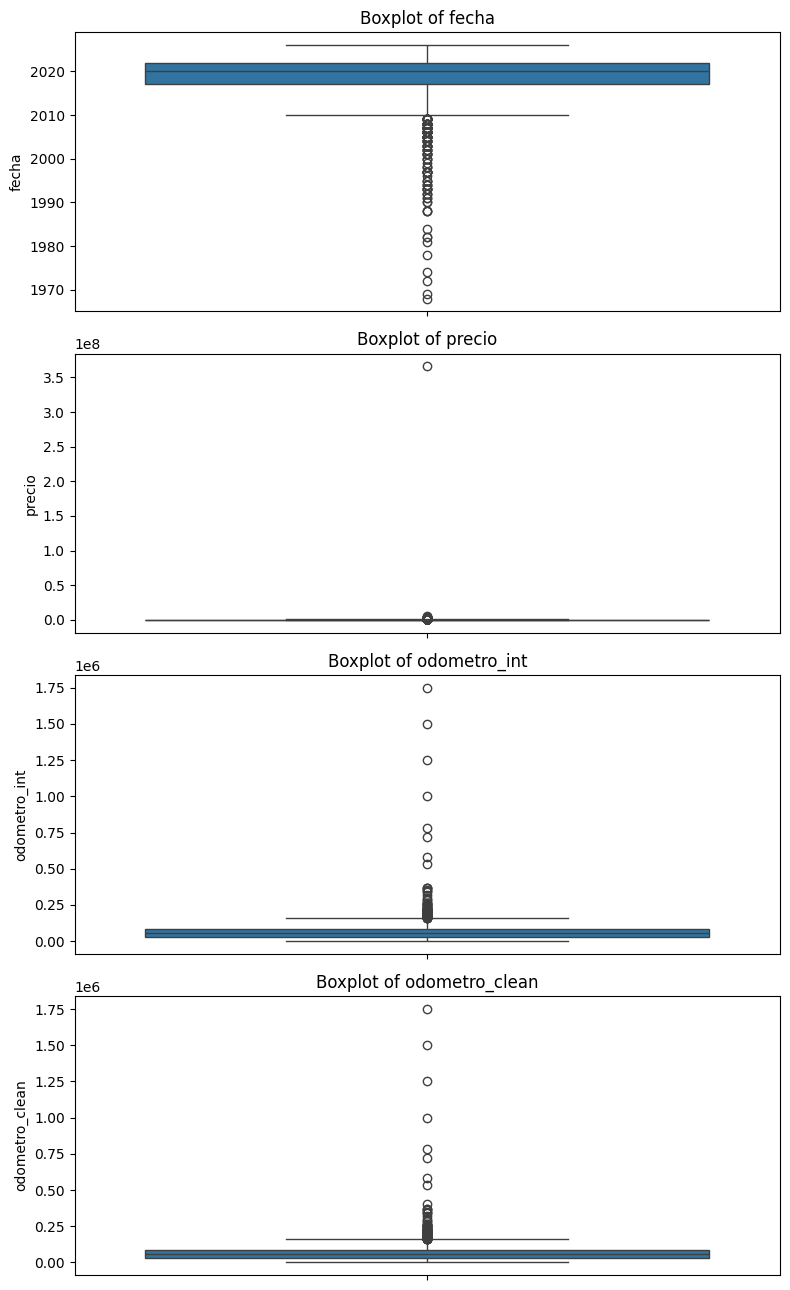

In [136]:
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 2 * len(numerical_columns) + 5))
for i, col in enumerate(numerical_columns):
    # boxplot
    sns.boxplot(data=seminuevos_df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

* precio, odometro_int presentan una asimetría fuertemente positiva (skewness > 10), lo que indica una distribución sesgada a la derecha: la mayoría de los valores son bajos y hay pocos muy altos, típicos de autos muy caros o con alto kilometraje.

* fecha muestra asimetría negativa (skewness = -2.74), es decir, hay más autos recientes y pocos modelos muy antiguos que sesgan la distribución a la izquierda.

* En cuanto a curtosis, todas las variables son leptocúrticas (curtosis >> 3), lo que sugiere presencia de outliers. Destaca precio con una curtosis extrema (8807), seguido por odometro_int y odometro_clean (> 270), lo que indica valores atípicos significativos en esas variables.

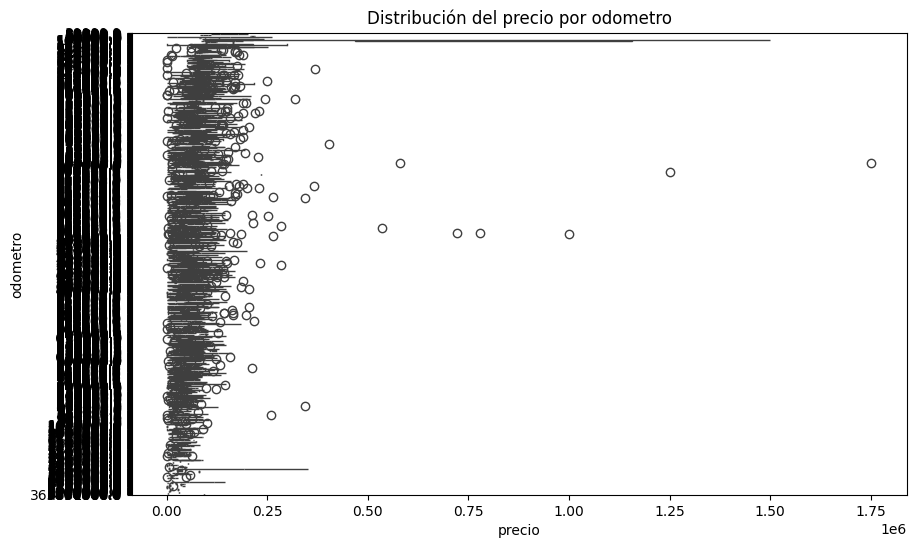

In [156]:
plt.figure(figsize=(10, 6))
#tuve que agregar el orient porque por ser númerica loan percent no se observaba correctamente
sns.boxplot(x='odometro_clean', y='precio', data=seminuevos_df, orient='h')
plt.title('Distribución del precio por odometro')
plt.xlabel('precio')
plt.ylabel('odometro')
plt.show()

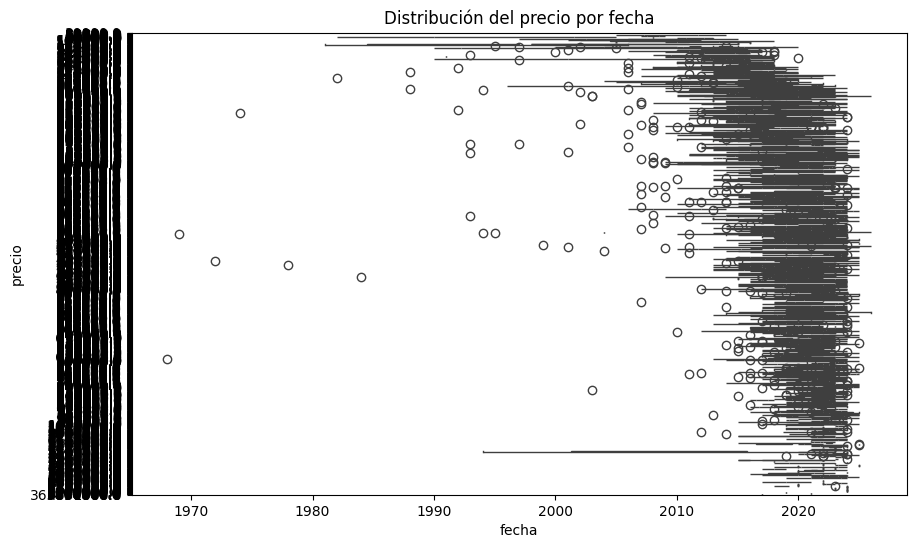

In [155]:
plt.figure(figsize=(10, 6))
#tuve que agregar el orient porque por ser númerica loan percent no se observaba correctamente
sns.boxplot(x='fecha', y='precio', data=seminuevos_df, orient='h')
plt.title('Distribución del precio por fecha')
plt.xlabel('fecha')
plt.ylabel('precio')
plt.show()

**VARIABLES CATEGORICAS**

In [137]:
categoricas_bajacardinalidad = ['carroceria', 'color', 'combustible']  # solo las que tú decidas

In [146]:
seminuevos_df.nunique()

,0
carroceria,20
color,46
combustible,4
descripcion,2199
fecha,46
marca,68
modelo,1029
odometro,4526
precio,1824
url,8953


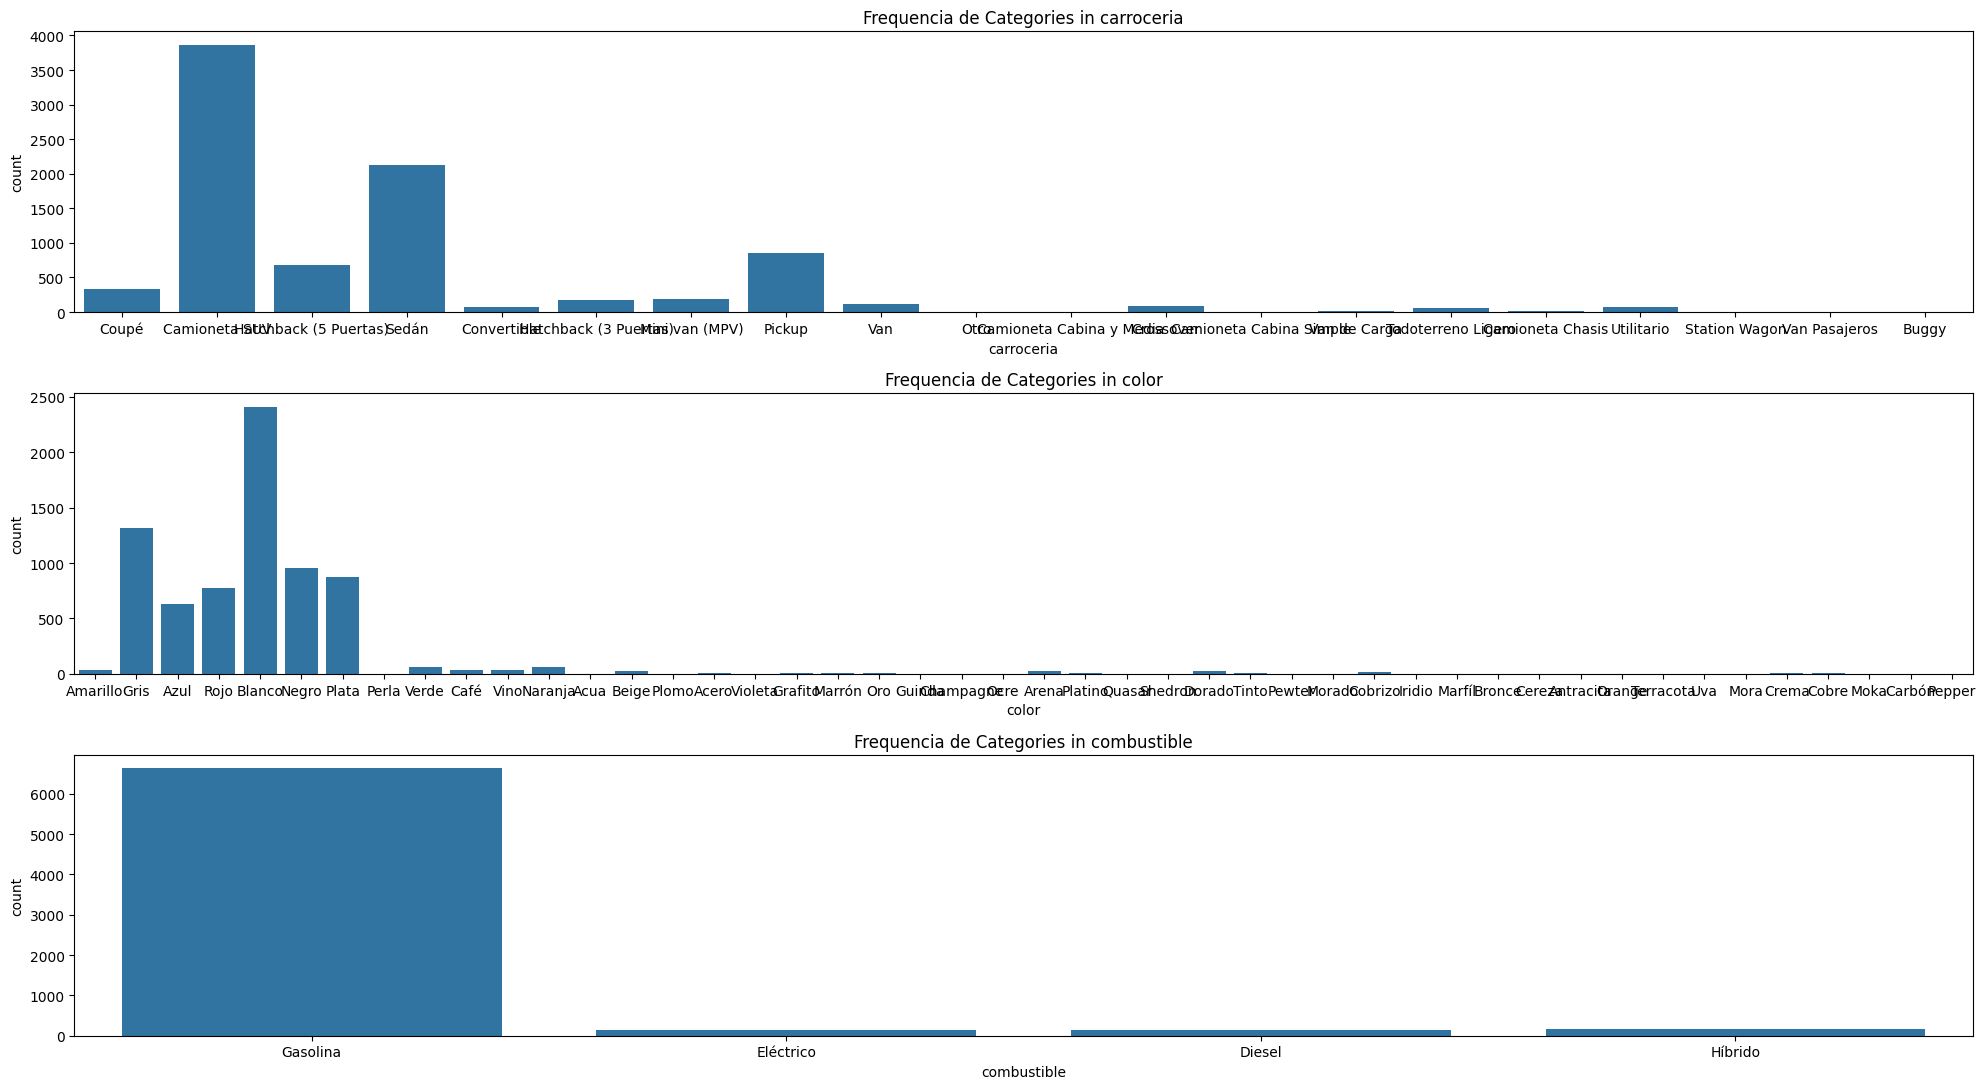

In [147]:
fig, axes = plt.subplots(nrows=len(categoricas_bajacardinalidad), ncols=1, figsize=(20, 2 * len(categoricas_bajacardinalidad) + 5))
for i, col in enumerate(categoricas_bajacardinalidad):
    # Bar
    sns.countplot(x=col, data=seminuevos_df, ax=axes[i])
    axes[i].set_title(f'Frequencia de Categories in {col}')
plt.tight_layout()
plt.show()

 ¿Necesitamos aplicar alguna transformación no lineal?
¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)
¿Se deberían normalizar las imágenes para visualizarlas mejor?
¿Hay desequilibrio en las clases de la variable objetivo?

**CORRELACION**

In [149]:
seminuevos_df_num = seminuevos_df.select_dtypes(include=['number'])
correlation = seminuevos_df_num.corr(method='pearson')
correlation

,fecha,precio,odometro_int,odometro_clean
fecha,1.000000,0.022363,-0.512423,-0.519934
precio,0.022363,1.000000,-0.018320,-0.018350
odometro_int,-0.512423,-0.018320,1.000000,0.997530
odometro_clean,-0.519934,-0.018350,0.997530,1.000000


<Axes: >

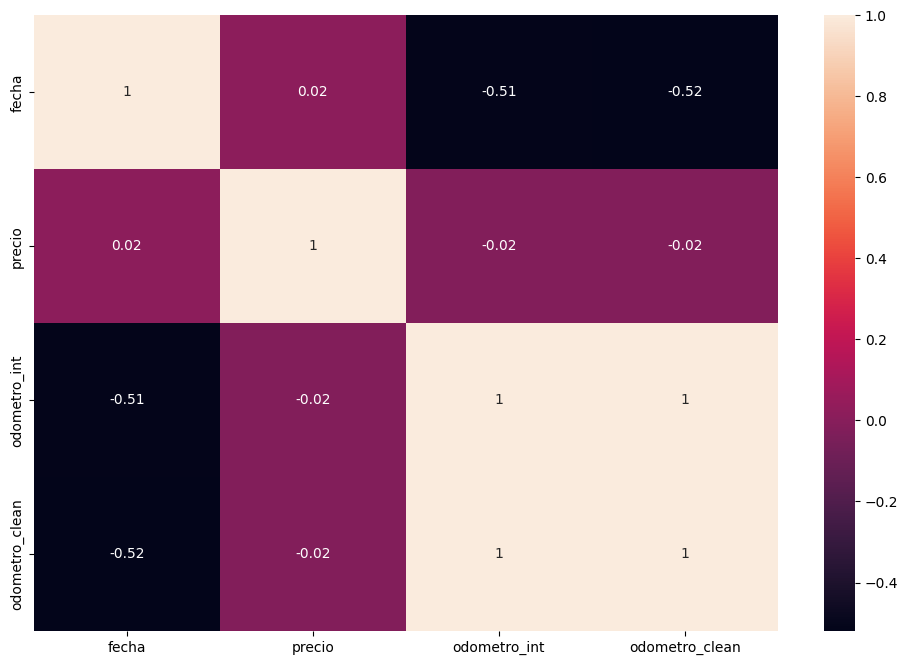

In [150]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(round(correlation,2), annot=True)

**VALORES FALTANTES**

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

In [167]:
#datos faltantes
na= seminuevos_df.isna().mean()*100
print(na)

carroceria         2.568971
color             17.770580
combustible       20.719312
descripcion       70.389813
fecha              0.089356
marca              0.089356
modelo             0.089356
odometro           0.089356
precio             0.089356
url                0.000000
odometro_int       0.089356
km_millas          0.089356
odometro_clean     0.089356
tipo_color        96.224729
dtype: float64


In [174]:
seminuevos_df.nunique()

,0
carroceria,20
color,46
combustible,4
descripcion,2199
fecha,46
marca,66
modelo,984
odometro,4379
precio,1798
url,8723


Opciones

a) ELIMINAR COLUMNAS
* Eliminar columnas que tengan muchos valores faltantes sería color, combustible, tipo de color
* Eliminar columnas con alta cardinalidad como descrpción, url

b) ELIMINAR REGISTROS (FILAS)

c) IMPUTAR VALORES  


In [168]:
#OPCION A
#modelo, descripción y url esta inalcanzable, tiene demasiada cardinalidad ademas descripción tiene 70% de valores faltantes
seminuevos_fe_df = seminuevos_df.drop(['descripcion', 'url', 'tipo_color', 'km_millas', 'odometro' ,'odometro_int', 'modelo'], axis = 1)

In [170]:
number_of_records = len(seminuevos_fe_df)
print('Cantidad de registros en el dataframe: ' + str(number_of_records))

number_of_columns = len(seminuevos_fe_df.columns)
print('Cantidad de columnas en el dataframe: ' + str(number_of_columns))

Cantidad de registros en el dataframe: 8953
Cantidad de columnas en el dataframe: 7


DILEMA: estamos privilegiando no eliminar color y combustible a costa de los registros... pero entonces o eliminamos color y combustible perdiendo los atributos o les imputamos la moda...

In [171]:
#OPCION B: Eliminamos registros con datos faltantes con menos del 0.05 de valores faltantes
seminuevos_fe_df = seminuevos_fe_df.dropna(subset = [column for column in seminuevos_fe_df.columns if seminuevos_fe_df[column].isna().sum() < 0.05 * len(seminuevos_fe_df)])
print('Porcentaje de registros eliminados del dataframe: ' + str(round((number_of_records - len(seminuevos_fe_df)) * 100 / number_of_records, 2)))

Porcentaje de registros eliminados del dataframe: 2.57


In [172]:
#OPCION C
for column in seminuevos_fe_df.columns:
    if pd.api.types.is_numeric_dtype(seminuevos_fe_df[column]):
        skew = seminuevos_fe_df[column].skew()
        if abs(skew) < 0.15:
            # Imputar usando la media si se trata de una variable numérica relativamente simétrica
            seminuevos_fe_df[column] = seminuevos_fe_df[column].fillna(seminuevos_fe_df[column].mean())
        else:
            # Imputar usando la mediana si se trata de una variable numérica sesgada
            seminuevos_fe_df[column] = seminuevos_fe_df[column].fillna(seminuevos_fe_df[column].median())
    else:
        # Imputar usando la moda para si se trata de una variable categórica
        seminuevos_fe_df[column] = seminuevos_fe_df[column].fillna(seminuevos_fe_df[column].mode().iloc[0])

In [173]:
na= seminuevos_fe_df.isna().mean()*100
print(na)

carroceria        0.0
color             0.0
combustible       0.0
fecha             0.0
marca             0.0
precio            0.0
odometro_clean    0.0
dtype: float64


# **FE**

DATOS CRUDOIS - DATOS PARA ML
* Generación de nuevas características
* Discretización o binning
* Codificación (ordinal, one hot,…)
* Escalamiento (normalización, estandarización, min – max,…)
* Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

METODOS DE FILTRADO

* Umbral de varianza
* Correlación
* Chi-cuadrado
* ANOVA
* Análisis de componentes principales (PCA)
* Análisis factorial (FA)
